In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import qgrid
import gensim
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
import nltk
os.chdir(os.getcwd() + '/..')
from data_io import *
from speech import *
import time
import matplotlib.pyplot as plt



/Users/pmatias/Library/Python/3.8/lib/python/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Loading w2v window=5 dimension=100...done
Loading w2v window=5 dimension=150...done
Loading w2v window=5 dimension=200...done
Loading w2v window=10 dimension=100...done
Loading w2v window=10 dimension=150...done
Loading w2v window=10 dimension=200...done
Loading w2v window=15 dimension=100...done
Loading w2v window=15 dimension=150...done
Loading w2v window=15 dimension=200...done
Loading w2v window=20 dimension=100...done
Loading w2v window=20 dimension=150...done
Loading w2v window=20 dimension=200...done


In [2]:
# Read data.
labeled = load_data()
unlabeled = load_unlabeled_data()
all_data = labeled.data + unlabeled.data

-- train data
4370
-- dev data
414
Reading unlabeled data


# Example

In [29]:
# Compute embeddings of labeled data to use as seed for means
embedding_vectorizer = lambda : W2VAggVectorizerAvgTfidf(tfidf=TfidfVectorizer(tokenizer=nltk.word_tokenize, max_df=0.8), window=20, dim=200)
labeled_embeddings = embedding_vectorizer().fit_transform(np.array(labeled.data))

/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [30]:
df = pd.DataFrame(labeled_embeddings)
df['y'] = labeled.labels
labeled_centroids = df.groupby('y').mean()
labeled_centroids

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
y,,,,,,,,,,,,,,,,,,,,,
BACHMANN_PRIMARY2012,0.030651,-0.176995,-0.259230,0.101814,0.227240,-0.186448,0.134401,0.290007,-0.159675,0.068513,...,-0.025733,0.108390,-0.037298,0.021147,0.147839,0.165831,0.155738,-0.261267,-0.168794,-0.047547
BIDEN_PRIMARY2008,0.035259,-0.116779,-0.260097,0.265627,0.329130,-0.182348,0.082952,0.160455,-0.175708,0.015351,...,0.035372,0.218609,-0.028579,0.083595,0.156558,0.089780,0.231860,-0.237090,-0.104279,-0.138312
CAIN_PRIMARY2012,0.035402,-0.179322,-0.597081,0.270501,0.319004,-0.276891,0.404945,0.293255,-0.219411,0.069792,...,0.134259,0.295359,0.076014,0.314701,0.001310,0.332318,0.356002,-0.330052,-0.343563,0.142682
CLINTON_PRIMARY2008,0.002339,-0.310853,-0.381881,0.182893,0.286275,-0.316618,0.190021,0.173483,-0.181305,0.080250,...,0.014381,0.218628,0.099594,0.146196,0.112094,0.192809,0.275813,-0.231331,-0.177737,0.008820
EDWARDS_PRIMARY2008,0.015320,-0.298841,-0.382260,0.178648,0.310623,-0.284956,0.168586,0.146056,-0.182582,0.049992,...,-0.000845,0.214377,0.082465,0.138061,0.079208,0.178573,0.204402,-0.235857,-0.202765,-0.045778
GINGRICH_PRIMARY2012,0.039144,-0.157833,-0.286416,0.221987,0.302676,-0.168616,0.119300,0.212220,-0.203068,0.071854,...,0.035842,0.142271,0.066109,0.195116,0.115715,0.157412,0.280623,-0.190565,-0.216970,0.050007
GIULIANI_PRIMARY2008,0.075976,-0.191621,-0.398990,0.248561,0.335911,-0.197274,0.142533,0.188457,-0.175400,0.021009,...,0.041728,0.186195,0.072824,0.213545,0.094343,0.213442,0.293521,-0.208370,-0.164689,0.014297
HUCKABEE_PRIMARY2008,0.116032,-0.282734,-0.530459,0.302966,0.324563,-0.257550,0.218983,0.257734,-0.161257,0.049942,...,0.060635,0.229011,0.134884,0.333880,0.024222,0.305493,0.375064,-0.278800,-0.215327,0.016738
HUNTSMAN_PRIMARY2012,-0.064186,-0.147404,-0.107736,0.077235,0.290990,-0.203358,0.122857,0.145819,-0.177705,0.071085,...,0.009939,0.149658,-0.080600,-0.109244,0.156967,0.035834,0.063381,-0.140209,-0.158498,0.033116


In [31]:
cosine_similarities = pd.DataFrame(cosine_similarity(labeled_centroids.values)).set_index(labeled_centroids.index)
cosine_similarities

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
y,,,,,,,,,,,,,,,,,,,
BACHMANN_PRIMARY2012,1.000000,0.880674,0.749618,0.875112,0.907599,0.883808,0.870692,0.789124,0.892046,0.954380,0.901865,0.823724,0.963379,0.950745,0.914959,0.862848,0.906403,0.837660,0.928967
BIDEN_PRIMARY2008,0.880674,1.000000,0.768499,0.890123,0.931070,0.890425,0.918616,0.853939,0.802972,0.933269,0.888053,0.858412,0.855289,0.845420,0.891004,0.748874,0.785333,0.836892,0.943215
CAIN_PRIMARY2012,0.749618,0.768499,1.000000,0.868746,0.851875,0.876022,0.898839,0.939390,0.608881,0.801949,0.794757,0.870420,0.695256,0.734919,0.667894,0.739816,0.731876,0.936063,0.873599
CLINTON_PRIMARY2008,0.875112,0.890123,0.868746,1.000000,0.978155,0.950748,0.958122,0.940360,0.784034,0.935432,0.958540,0.931884,0.852481,0.902586,0.869690,0.801568,0.858505,0.966912,0.955053
EDWARDS_PRIMARY2008,0.907599,0.931070,0.851875,0.978155,1.000000,0.939593,0.959714,0.921656,0.831192,0.967075,0.963712,0.934097,0.895438,0.920271,0.906376,0.803964,0.853062,0.934969,0.978212
GINGRICH_PRIMARY2012,0.883808,0.890425,0.876022,0.950748,0.939593,1.000000,0.967851,0.933977,0.777856,0.897488,0.885370,0.941400,0.849251,0.884866,0.857091,0.784315,0.859250,0.950222,0.937070
GIULIANI_PRIMARY2008,0.870692,0.918616,0.898839,0.958122,0.959714,0.967851,1.000000,0.971546,0.746041,0.912526,0.904261,0.965912,0.833200,0.843264,0.834031,0.767337,0.813993,0.961795,0.973748
HUCKABEE_PRIMARY2008,0.789124,0.853939,0.939390,0.940360,0.921656,0.933977,0.971546,1.000000,0.618069,0.855312,0.852197,0.955797,0.730651,0.760815,0.726101,0.741154,0.761482,0.973978,0.929427
HUNTSMAN_PRIMARY2012,0.892046,0.802972,0.608881,0.784034,0.831192,0.777856,0.746041,0.618069,1.000000,0.886276,0.848339,0.693829,0.929945,0.934825,0.962184,0.757429,0.828022,0.691682,0.825546


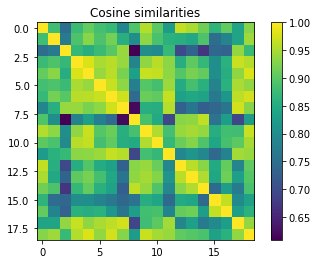

In [32]:
plt.imshow(cosine_similarities)
plt.title('Cosine similarities')
plt.colorbar()

In [33]:
dotproduct_similarities = labeled_centroids.dot(labeled_centroids.T)
dotproduct_similarities

y,BACHMANN_PRIMARY2012,BIDEN_PRIMARY2008,CAIN_PRIMARY2012,CLINTON_PRIMARY2008,EDWARDS_PRIMARY2008,GINGRICH_PRIMARY2012,GIULIANI_PRIMARY2008,HUCKABEE_PRIMARY2008,HUNTSMAN_PRIMARY2012,MCCAIN_PRIMARY2008,OBAMA_PRIMARY2008,PAUL_PRIMARY2012,PAWLENTY_PRIMARY2012,PERRY_PRIMARY2012,RICHARDSON_PRIMARY2008,ROMNEY_PRIMARY2008,ROMNEY_PRIMARY2012,SANTORUM_PRIMARY2012,THOMPSON_PRIMARY2008
y,,,,,,,,,,,,,,,,,,,
BACHMANN_PRIMARY2012,3.970948,3.694079,4.813039,4.123296,4.285814,3.920441,4.154507,4.485869,3.476717,3.975390,4.103931,4.536287,4.087205,4.013911,3.730650,3.847475,3.963007,4.369195,4.193939
BIDEN_PRIMARY2008,3.694079,4.430864,5.212188,4.430245,4.644283,4.172260,4.630056,5.127729,3.305823,4.106410,4.268690,4.993576,3.833007,3.770277,3.837597,3.527337,3.627058,4.611055,4.498105
CAIN_PRIMARY2012,4.813039,5.212188,10.381613,6.618490,6.504301,6.283153,6.934614,8.634402,3.837068,5.401200,5.847608,7.750557,4.769356,5.016817,4.403272,5.333966,5.173998,7.894490,6.377042
CLINTON_PRIMARY2008,4.123296,4.430245,6.618490,5.590713,5.480670,5.004138,5.424535,6.342809,3.625797,4.623351,5.175536,6.089300,4.291416,4.521458,4.207594,4.240999,4.453824,5.984214,5.116067
EDWARDS_PRIMARY2008,4.285814,4.644283,6.504301,5.480670,5.615451,4.956353,5.445557,6.230393,3.852374,4.790311,5.214958,6.117250,4.517623,4.620238,4.394772,4.263079,4.435364,5.799311,5.251703
GINGRICH_PRIMARY2012,3.920441,4.172260,6.283153,5.004138,4.956353,4.955188,5.158774,5.930893,3.386602,4.176091,4.500555,5.791302,4.024837,4.173150,3.903844,3.906741,4.196683,5.536585,4.725817
GIULIANI_PRIMARY2008,4.154507,4.630056,6.934614,5.424535,5.445557,5.158774,5.733450,6.636292,3.493860,4.567351,4.944396,6.391716,4.247562,4.277873,4.086258,4.111389,4.276466,6.028057,5.282379
HUCKABEE_PRIMARY2008,4.485869,5.127729,8.634402,6.342809,6.230393,5.930893,6.636292,8.137821,3.448468,5.100232,5.551436,7.535146,4.437584,4.598220,4.238249,4.731040,4.766178,7.272603,6.006812
HUNTSMAN_PRIMARY2012,3.476717,3.305823,3.837068,3.625797,3.852374,3.386602,3.493860,3.448468,3.825338,3.623392,3.788921,3.750241,3.872347,3.873664,3.850603,3.314903,3.553311,3.541021,3.658063


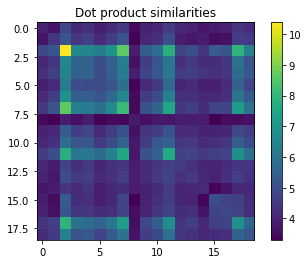

In [34]:
plt.imshow(dotproduct_similarities)
plt.title('Dot product similarities')
plt.colorbar()

Text(0.5, 1.0, 'Pairwise dotproduct similatiries')

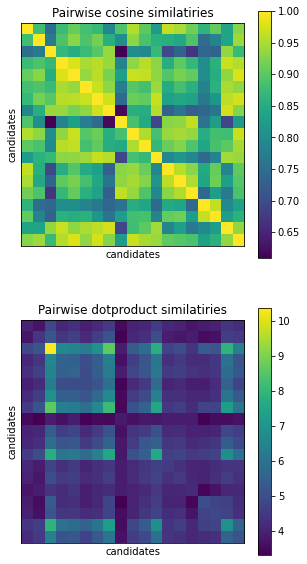

In [35]:
fig, axs = plt.subplots(2, 1, figsize=(5,10))

im = axs[0].imshow(cosine_similarities)
fig.colorbar(im, ax=axs[0])
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xlabel('candidates')
axs[0].set_ylabel('candidates')
axs[0].set_title('Pairwise cosine similatiries')

im = axs[1].imshow(dotproduct_similarities)
fig.colorbar(im, ax=axs[1])
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[1].set_xlabel('candidates')
axs[1].set_ylabel('candidates')
axs[1].set_title('Pairwise dotproduct similatiries')

# plt.imshow(cosine_similarities)
# plt.title('Cosine similarities')
# plt.colorbar()

# AvgW2V_tfidf

In [33]:
labeled_embeddings = {}
for i, window in enumerate([5, 10, 15]):
    for j, dim in enumerate([100, 150, 200]):
        # Compute embeddings of labeled data to use as seed for means
        embedding_vectorizer = lambda : TfidfEmbeddingVectorizer(tokenizer=nltk.word_tokenize, window=window, dim=dim)
        labeled_embeddings[f'w{window}_d{dim}'] = embedding_vectorizer().fit_transform(np.array(labeled.data))

/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern

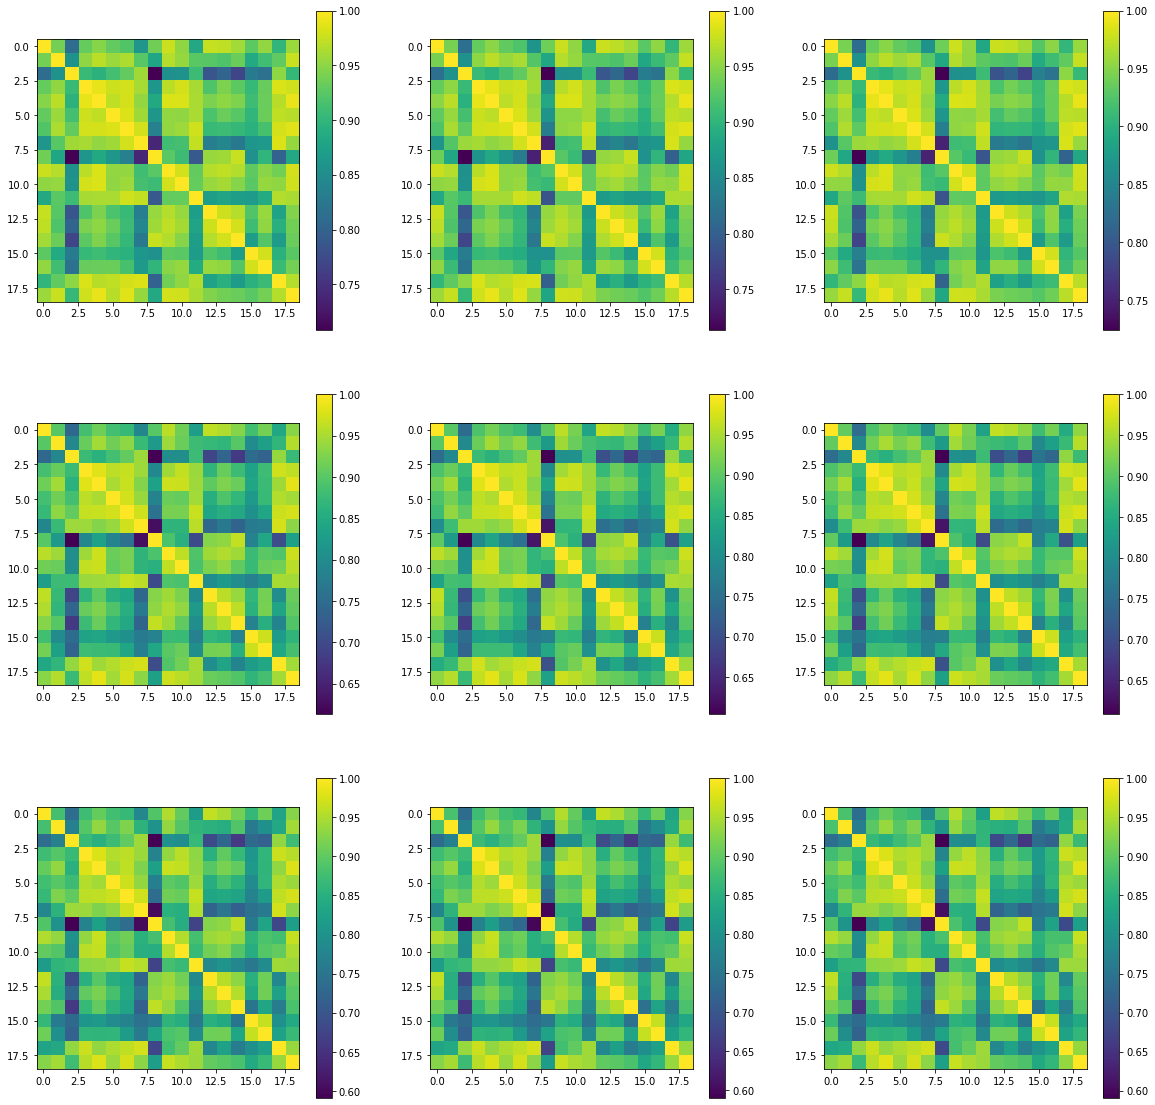

In [43]:
fig, axs = plt.subplots(3, 3, figsize=(20,20))
for i, window in enumerate([5, 10, 15]):
    for j, dim in enumerate([100, 150, 200]):
        # Get centroids for each candidate
        df = pd.DataFrame(labeled_embeddings[f'w{window}_d{dim}'])
        df['y'] = labeled.labels
        labeled_centroids = df.groupby('y').mean()
        
        # Get similarities
        cosine_similarities = pd.DataFrame(cosine_similarity(labeled_centroids.values)).set_index(labeled_centroids.index)
        
        # Plot
        im = axs[i, j].imshow(cosine_similarities)
        fig.colorbar(im, ax=axs[i, j])

NameError: name 'pd' is not defined

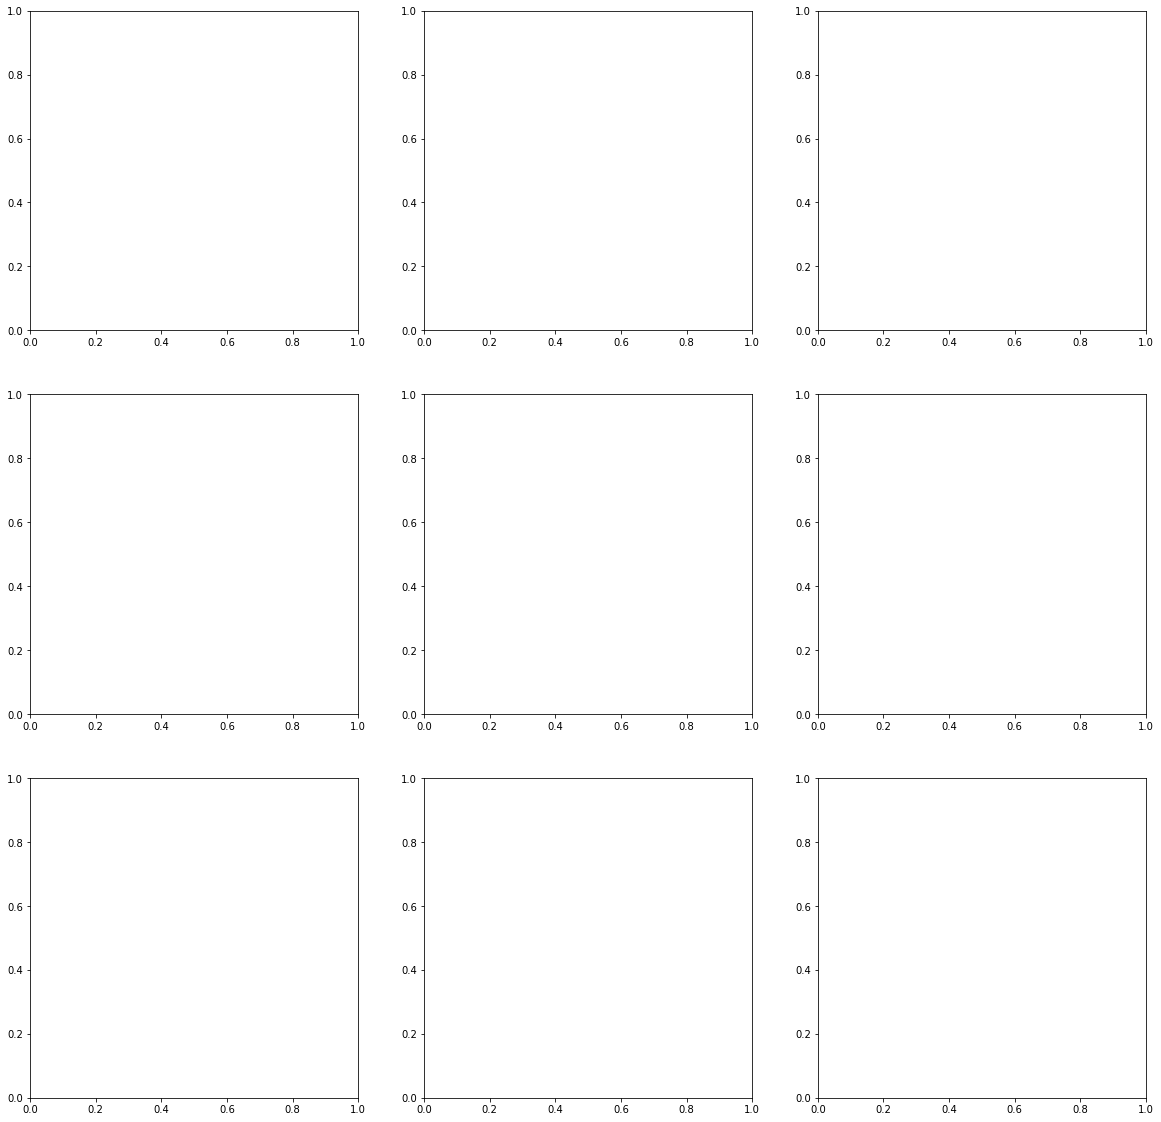

In [1]:
fig, axs = plt.subplots(3, 3, figsize=(20,20))
for i, window in enumerate([5, 10, 15]):
    for j, dim in enumerate([100, 150, 200]):
        # Get centroids for each candidate
        df = pd.DataFrame(labeled_embeddings[f'w{window}_d{dim}'])
        df['y'] = labeled.labels
        labeled_centroids = df.groupby('y').mean()
        
        # Get similarities
        dotproduct_similarities = labeled_centroids.dot(labeled_centroids.T)
        
        # Plot
        im = axs[i, j].imshow(dotproduct_similarities)
        fig.colorbar(im, ax=axs[i, j])

# AvgW2V

In [4]:
avgw2v = {}
for i, window in enumerate([5, 10, 15]):
    for j, dim in enumerate([100, 150, 200]):
        # Compute embeddings of labeled data to use as seed for means
        avgw2v_vectorizer = lambda : AvgW2VVectorizer(tokenizer=nltk.word_tokenize, window=window, dim=dim)
        avgw2v[f'w{window}_d{dim}'] = avgw2v_vectorizer().fit_transform(np.array(labeled.data))

/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern

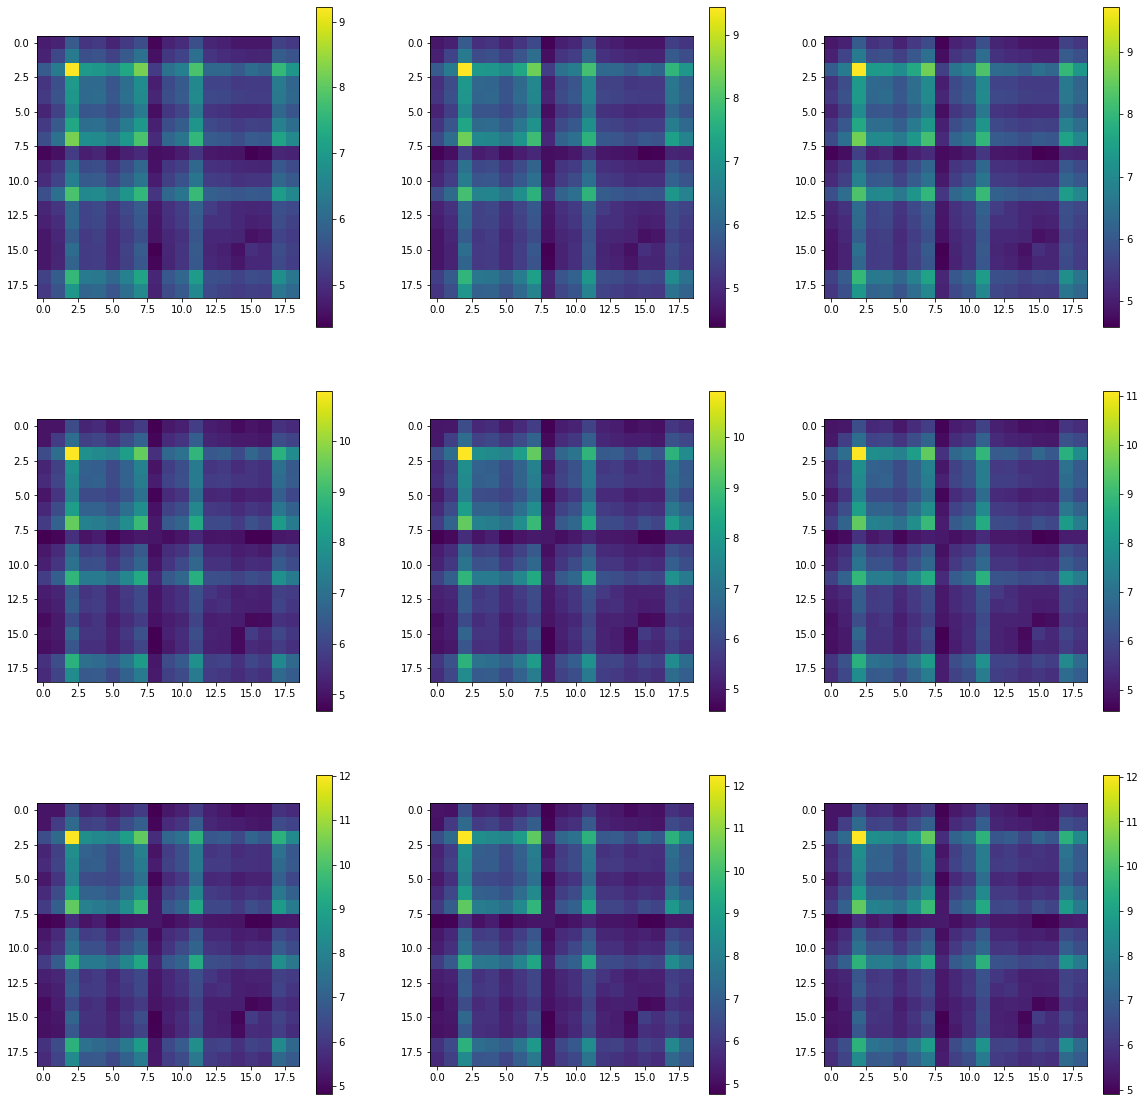

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(20,20))
for i, window in enumerate([5, 10, 15]):
    for j, dim in enumerate([100, 150, 200]):
        # Get centroids for each candidate
        df = pd.DataFrame(avgw2v[f'w{window}_d{dim}'])
        df['y'] = labeled.labels
        labeled_centroids = df.groupby('y').mean()
        
        # Get similarities
        dotproduct_similarities = labeled_centroids.dot(labeled_centroids.T)
        
        # Plot
        im = axs[i, j].imshow(dotproduct_similarities)
        fig.colorbar(im, ax=axs[i, j])

Text(0.5, 1.0, 'Axis [1, 1]')

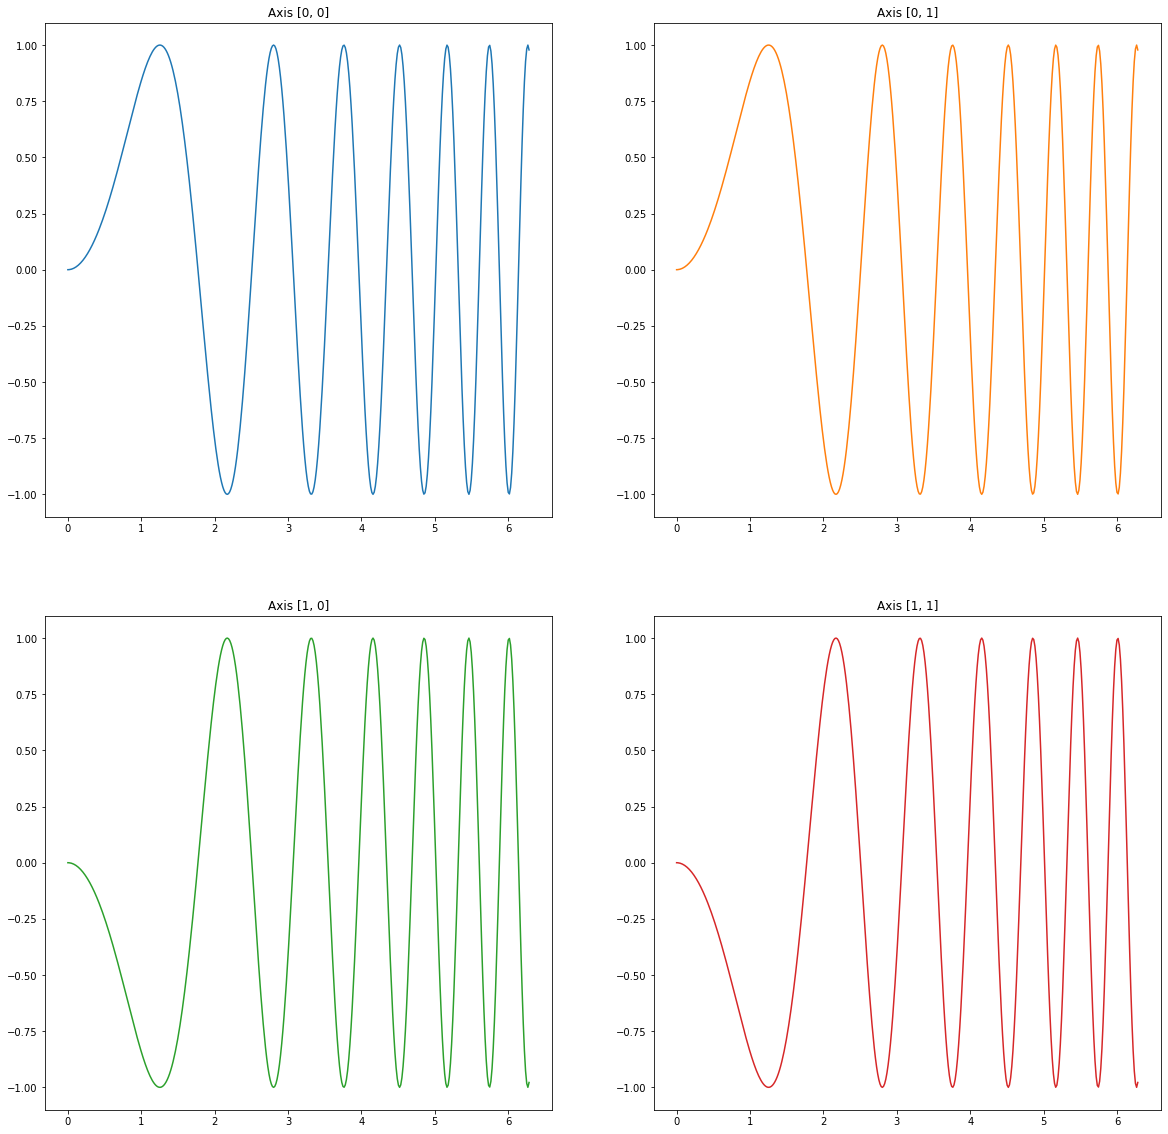

In [23]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
fig, axs = plt.subplots(2, 2, figsize=(20,20))
axs[0, 0].plot(x, y)
axs[0, 0].set_title('Axis [0, 0]')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')
axs[1, 1].plot(x, -y, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

In [ ]:
# Determine weights proportional to affiliation from labels
def weights_from_labeled():
    df = pd.DataFrame(labeled.labels)
    df['a'] = 1
    return df.groupby(0).sum() / len(labeled.labels)

In [48]:
pipe_19_glove_labelinit = Pipeline([
  (f'avgw2v_tfidf', embedding_vectorizer_glove()),
  ('gmm', GaussianMixture(n_components=19,
                    init_params='random',
                    weights_init=weights_from_labeled().values.ravel(),
                    means_init=labeled_centroids.values,
                    verbose=10))
])

print("Computing clusters...", end='')
pipe_19_glove_labelinit.fit(np.array(all_data))
print("done")
print("%0.2fs" % (time.time() - t0))

Computing clusters...

/Users/pmatias/Library/Python/3.8/lib/python/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


Initialization 0
  Iteration 10	 time lapse 9.05905s	 ll change 0.03186
  Iteration 20	 time lapse 8.36006s	 ll change 0.00789
  Iteration 30	 time lapse 8.31998s	 ll change 0.00393
  Iteration 40	 time lapse 8.14535s	 ll change 0.00176
  Iteration 50	 time lapse 8.11468s	 ll change 0.00140
Initialization converged: True	 time lapse 46.86748s	 ll 46.49025
done
2625.88s


In [15]:
gmm_19_glove_labelinit = pipe_19_glove_labelinit['gmm']
X_labeled_19_glove_labelinit = pipe_19_glove_labelinit['avgw2v_tfidf'].transform(np.array(labeled.data))
probs_19_glove_labelinit = gmm_19_glove_labelinit.predict_proba(X_labeled_19_glove_labelinit)

# Stats GMM random seed

In [16]:
df = pd.DataFrame(probs_19_glove_rnd)
df['y'] = labeled.labels
candidates_probs_rnd = df.groupby('y').mean()
candidates_probs_rnd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
y,,,,,,,,,,,,,,,,,,,
BACHMANN_PRIMARY2012,0.021637,0.169130,0.005172,0.049809,0.048364,0.093367,0.000495,0.016529,0.101253,0.027326,0.101590,0.000703,0.019483,0.064756,0.041561,0.107225,0.038345,0.004032,0.089223
BIDEN_PRIMARY2008,0.058564,0.042470,0.113770,0.029102,0.010192,0.054844,0.031521,0.011257,0.060156,0.016921,0.017944,0.040846,0.208260,0.085864,0.003046,0.157024,0.041623,0.000296,0.016300
CAIN_PRIMARY2012,0.148171,0.001705,0.000165,0.085294,0.000720,0.000050,0.000115,0.000009,0.164054,0.000027,0.113432,0.101125,0.004705,0.276081,0.000010,0.000040,0.001016,0.000192,0.103090
CLINTON_PRIMARY2008,0.105245,0.043833,0.017370,0.110638,0.051930,0.026771,0.043966,0.036033,0.069177,0.015643,0.086876,0.016182,0.048947,0.090013,0.085525,0.012387,0.030589,0.048853,0.060023
EDWARDS_PRIMARY2008,0.126952,0.069678,0.026328,0.091758,0.035654,0.031941,0.042557,0.012459,0.078290,0.023245,0.060290,0.006323,0.120659,0.115053,0.032832,0.038524,0.030530,0.020330,0.036594
GINGRICH_PRIMARY2012,0.058742,0.090240,0.019925,0.047576,0.097372,0.030443,0.035606,0.105783,0.070687,0.039795,0.029137,0.043791,0.018542,0.124147,0.030233,0.035909,0.031488,0.006017,0.084568
GIULIANI_PRIMARY2008,0.077830,0.054954,0.050008,0.056436,0.052939,0.045361,0.038158,0.008765,0.105153,0.013298,0.041981,0.028202,0.127778,0.081998,0.013794,0.052338,0.024216,0.034179,0.092613
HUCKABEE_PRIMARY2008,0.219323,0.052916,0.024945,0.033929,0.060241,0.006498,0.041366,0.007893,0.065359,0.012084,0.097880,0.031200,0.028682,0.160376,0.001628,0.027413,0.034592,0.013704,0.079973
HUNTSMAN_PRIMARY2012,0.031035,0.070290,0.035464,0.009230,0.009548,0.162839,0.105838,0.035738,0.204884,0.036335,0.000307,0.000041,0.015217,0.036661,0.064370,0.038398,0.001330,0.035708,0.106766


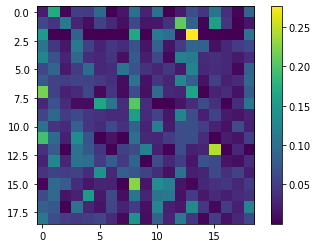

In [17]:
plt.imshow(candidates_probs_rnd)
plt.colorbar()

In [18]:
candidates_probs_rnd.std(axis=1)

y
BACHMANN_PRIMARY2012      0.046454
BIDEN_PRIMARY2008         0.054736
CAIN_PRIMARY2012          0.079400
CLINTON_PRIMARY2008       0.030988
EDWARDS_PRIMARY2008       0.037341
GINGRICH_PRIMARY2012      0.033312
GIULIANI_PRIMARY2008      0.032170
HUCKABEE_PRIMARY2008      0.055547
HUNTSMAN_PRIMARY2012      0.056208
MCCAIN_PRIMARY2008        0.036639
OBAMA_PRIMARY2008         0.029291
PAUL_PRIMARY2012          0.050096
PAWLENTY_PRIMARY2012      0.058716
PERRY_PRIMARY2012         0.035058
RICHARDSON_PRIMARY2008    0.031104
ROMNEY_PRIMARY2008        0.056783
ROMNEY_PRIMARY2012        0.041230
SANTORUM_PRIMARY2012      0.042457
THOMPSON_PRIMARY2008      0.037586
dtype: float64

0.04447988295181209


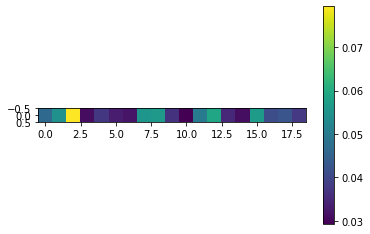

In [27]:
print(candidates_probs_rnd.std(axis=1).values.mean())
plt.imshow(np.expand_dims(candidates_probs_rnd.std(axis=1).values, axis=0))
plt.colorbar()

<AxesSubplot:xlabel='0'>

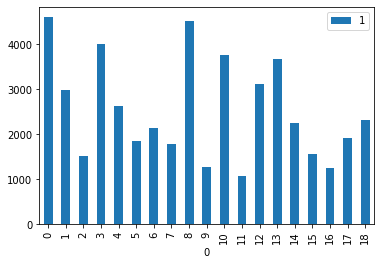

In [19]:
df = pd.DataFrame(pipe_19_glove_rnd.predict(np.array(all_data)))
df[1] = 1
df.groupby(0).sum().plot.bar()

# Stats GMM labeled centroids seed

In [20]:
df = pd.DataFrame(probs_19_glove_labelinit)
df['y'] = labeled.labels
candidates_probs_labelinit = df.groupby('y').mean()
candidates_probs_labelinit

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
y,,,,,,,,,,,,,,,,,,,
BACHMANN_PRIMARY2012,0.136987,0.004066,0.019843,0.014585,0.074375,0.001480,0.029361,0.050147,0.001550,0.011952,0.031974,0.023225,0.161445,0.081047,0.027070,0.053818,0.000254,0.101135,0.175686
BIDEN_PRIMARY2008,0.129400,0.086215,0.032295,0.000227,0.048697,0.000528,0.194544,0.009353,0.073202,0.184320,0.022409,0.048924,0.091043,0.002292,0.018010,0.017545,0.015622,0.013525,0.011851
CAIN_PRIMARY2012,0.009715,0.000016,0.224409,0.017397,0.099272,0.000132,0.074873,0.066351,0.047950,0.118258,0.001398,0.171533,0.000025,0.000066,0.000001,0.002330,0.000001,0.153251,0.013025
CLINTON_PRIMARY2008,0.038970,0.019569,0.023285,0.064345,0.088936,0.052004,0.048531,0.080771,0.015296,0.065887,0.077381,0.112811,0.017818,0.067517,0.048055,0.021215,0.043831,0.064302,0.049475
EDWARDS_PRIMARY2008,0.040084,0.038751,0.019927,0.009995,0.094314,0.028175,0.102825,0.077040,0.017370,0.104020,0.074053,0.118765,0.059029,0.051165,0.021419,0.030122,0.016988,0.042902,0.053056
GINGRICH_PRIMARY2012,0.094643,0.003740,0.058771,0.000741,0.073837,0.130270,0.045259,0.073844,0.038840,0.046657,0.024574,0.052345,0.047496,0.075239,0.010560,0.044835,0.041165,0.068611,0.068571
GIULIANI_PRIMARY2008,0.074681,0.044460,0.040856,0.037710,0.052654,0.019777,0.112131,0.054970,0.017618,0.134318,0.039810,0.079063,0.052389,0.018157,0.004719,0.053289,0.021278,0.047447,0.094674
HUCKABEE_PRIMARY2008,0.054415,0.017875,0.052616,0.024573,0.043673,0.024890,0.106402,0.137894,0.016911,0.040615,0.067962,0.146065,0.031844,0.017614,0.004182,0.032471,0.019917,0.095068,0.065013
HUNTSMAN_PRIMARY2012,0.037906,0.039469,0.003062,0.000424,0.056572,0.000113,0.009717,0.039455,0.094971,0.185757,0.008243,0.019528,0.146085,0.107659,0.034795,0.035359,0.035734,0.104573,0.040578


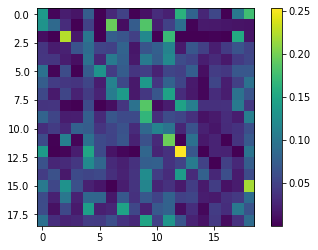

In [21]:
plt.imshow(candidates_probs_labelinit)
plt.colorbar()

In [22]:
candidates_probs_labelinit.std(axis=1)

y
BACHMANN_PRIMARY2012      0.055142
BIDEN_PRIMARY2008         0.059915
CAIN_PRIMARY2012          0.069665
CLINTON_PRIMARY2008       0.026744
EDWARDS_PRIMARY2008       0.033578
GINGRICH_PRIMARY2012      0.031526
GIULIANI_PRIMARY2008      0.033799
HUCKABEE_PRIMARY2008      0.041386
HUNTSMAN_PRIMARY2012      0.051881
MCCAIN_PRIMARY2008        0.037350
OBAMA_PRIMARY2008         0.027384
PAUL_PRIMARY2012          0.048024
PAWLENTY_PRIMARY2012      0.066855
PERRY_PRIMARY2012         0.030397
RICHARDSON_PRIMARY2008    0.032022
ROMNEY_PRIMARY2008        0.053788
ROMNEY_PRIMARY2012        0.026659
SANTORUM_PRIMARY2012      0.041232
THOMPSON_PRIMARY2008      0.037823
dtype: float64

0.04447988295181209


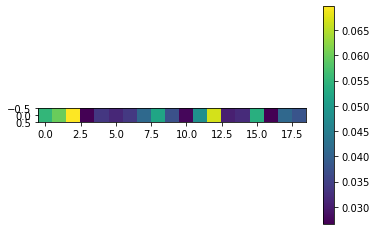

In [28]:
print(candidates_probs_rnd.std(axis=1).values.mean())
plt.imshow(np.expand_dims(candidates_probs_labelinit.std(axis=1).values, axis=0))
plt.colorbar()

<AxesSubplot:xlabel='0'>

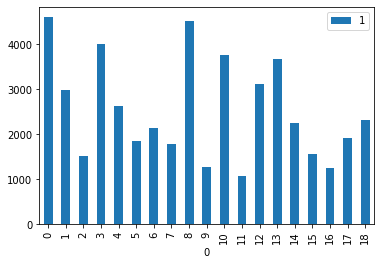

In [23]:
df = pd.DataFrame(pipe_19_glove_rnd.predict(np.array(all_data)))
df[1] = 1
df.groupby(0).sum().plot.bar()

In [10]:
class A:
    def __init__(self):
        setattr(self, 'a', 1)
A().a

1